In [1]:
__file__ = 'A1.ipynb'
import sys
import pathlib
sys.path.append(str(pathlib.Path(__file__).absolute().parent.parent)+"/FP4_lib")
import functions as f
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from uncertainties import unumpy as up
from uncertainties import ufloat
from uncertainties import wrap

In [2]:
with open('Data/Aufgabe_3.txt','r') as tf:
    data = np.genfromtxt(tf).T
with open('Res/cp-cal_res.txt','r') as tf:
    cal = np.genfromtxt(tf).T

data = f.channel_to_pos(data,cal)

In [3]:
data[1] = data[1]*100
yerr = 0.035339825186025027*np.abs(data[1])
print(np.mean(data[2]))

0.0012903333856597225


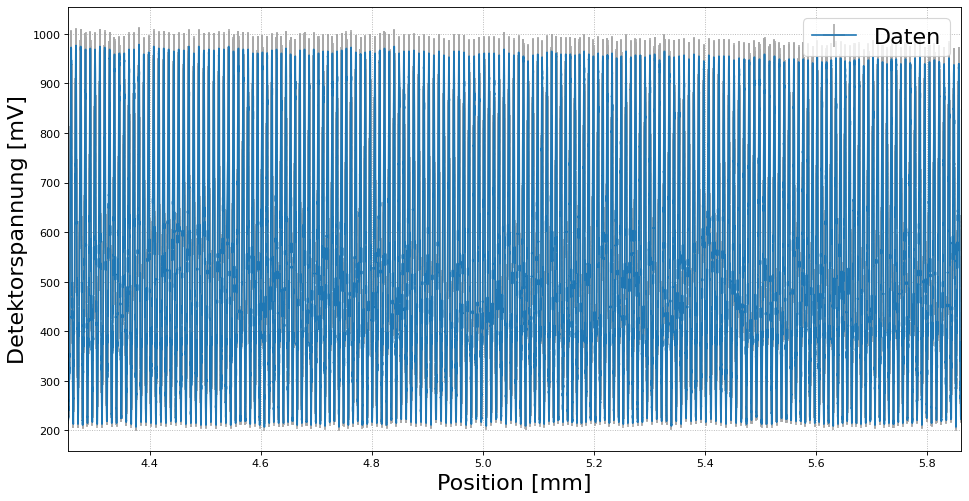

In [4]:
f.figsize(2)
plt.errorbar(data[0],data[1],yerr=yerr,xerr=data[2],label = 'Daten',ecolor='darkgray')

f.form([4.2532,5.8615],xlabel='Position [mm]',ylabel='Detektorspannung [mV]',name='Res/A3_interferogramm.pdf')

Wavelength: 3.3327089625593403e-06 m


/tmp/ipykernel_6555/3903527010.py:23: RuntimeWarning: divide by zero encountered in divide
  freqs = 1/freqs


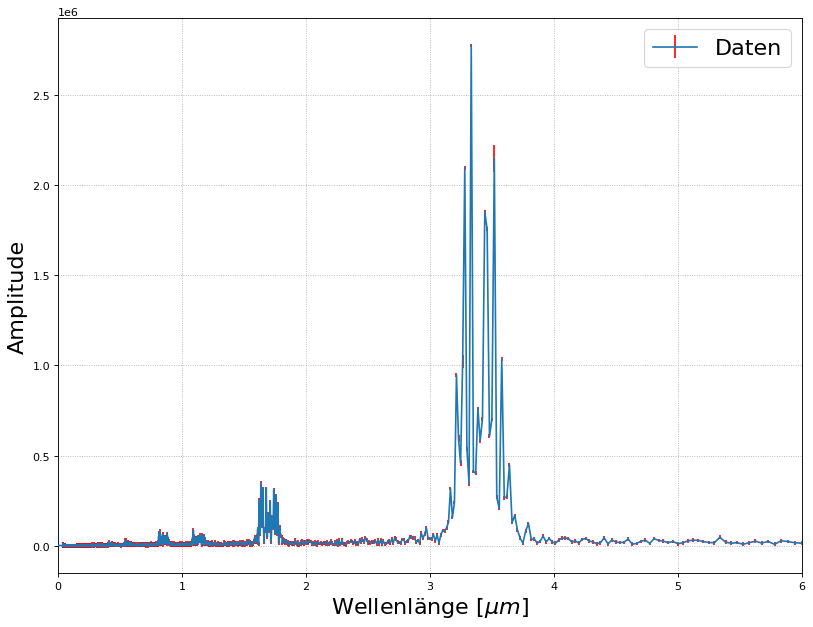

In [5]:
freq_scale = 2/5.127868608985219*1e-3

intensity = data[1]
position  = data[0]*freq_scale
xscale=1e6

intensity -= np.mean(intensity)


freqs = np.fft.fftfreq(len(intensity), d=((np.mean(np.diff(position)))))
fft_int = np.fft.fft(intensity)
fft_err = np.fft.fft(yerr).clip(100*100)


peak_idx = np.argmax(np.abs(fft_int))
peak_freq = freqs[peak_idx]


#plt.style.use('seaborn-v0_8-darkgrid')

print(f"Wavelength: {1/peak_freq} m")

freqs = 1/freqs

f.figsize(1)

plt.errorbar(freqs*xscale, np.abs(fft_int),yerr=np.abs(fft_err),ecolor='r',zorder=10,label='Daten')
plt.xlim(0,0.6e-5*xscale)
#plt.vlines(3.4032e-06,0,2.75e6,colors="r",zorder=5,alpha = 0.5,label='Center')
f.form(xlabel=f'Wellenlänge [$\mu m$]',ylabel='Amplitude',name='Res/A3_fft.pdf')

In [6]:
dat = [freqs, np.abs(fft_int),np.abs(fft_err)]

sorted_indices = sorted(range(len(dat[0])), key=lambda k: dat[0][k])

dat_sorted = [[dat[0][i], dat[1][i],dat[2][i]] for i in sorted_indices]

dat_sorted = np.array(dat_sorted).T

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 33
    # variables        = 3
    chi-square         = 90258.5161
    reduced chi-square = 3008.61720
    Akaike info crit   = 267.159547
    Bayesian info crit = 271.649070
    R-squared          = 0.99999999
[[Variables]]
    amplitude:  0.40341366 +/- 0.07290154 (18.07%) (init = 0.9627325)
    center:     3.3835e-06 +/- 3.0375e-08 (0.90%) (init = 3.407021e-06)
    sigma:      1.4574e-07 +/- 3.0328e-08 (20.81%) (init = 1.191292e-07)
    fwhm:       3.4319e-07 +/- 7.1416e-08 (20.81%) == '2.3548200*sigma'
    height:     1104305.24 +/- 184204.616 (16.68%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = +0.6400


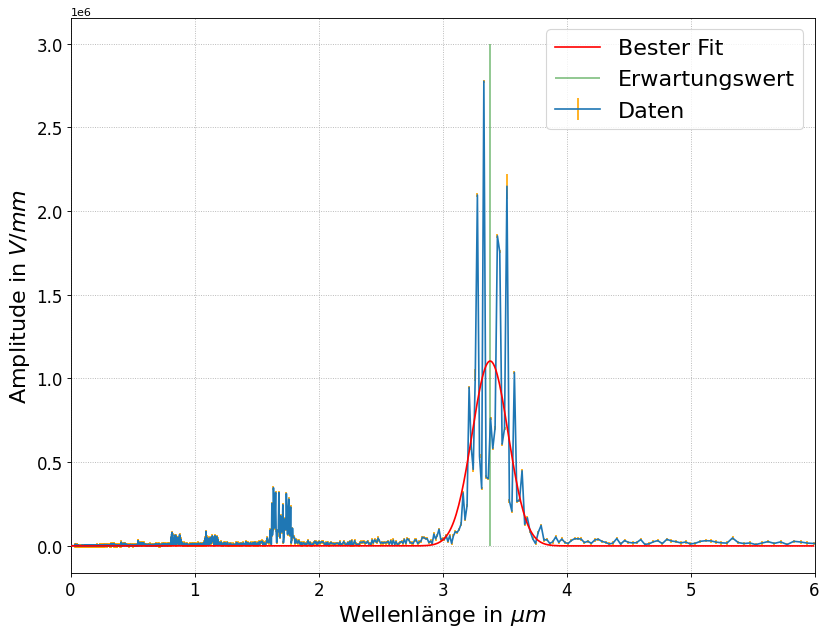

In [21]:
von,bis = f.pos(dat_sorted[0],0.31e-5),f.pos(dat_sorted[0],0.37e-5)

res = f.gausfit(dat_sorted[1,von:bis],dat_sorted[0,von:bis],dat_sorted[2,von:bis])

print(res.fit_report())

xscale=1e6

f.figsize(1)

plt.errorbar(freqs*xscale, np.abs(fft_int),yerr=np.abs(fft_err),ecolor='orange',label='Daten',zorder=5)
plt.plot(np.arange(0,6e-6,1e-8)*xscale,res.eval(x=np.arange(0,6e-6,1e-8)),color='r',label='Bester Fit',zorder=10)
plt.xlim(0,0.6e-5*xscale)
plt.vlines(3.3835e-06*xscale,0,3e6,colors="g",zorder=5,alpha = 0.5,label='Erwartungswert')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
f.form(xlabel=f'Wellenlänge in $\mu m$',ylabel='Amplitude in $V/mm$',name='Res/A3_fftfit.pdf')